In [1]:
import sys

import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

In [2]:
onedrive_link = "https://1drv.ms/u/s!AiqdXCxPTydhoogqfj86CvQcSInxtA?e=XdSlpK"
converted_link = create_onedrive_directdownload(onedrive_link)
df = pd.read_csv(converted_link, index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [3]:
goog = df.query("Name == 'GOOG'")[["Close"]].copy()

In [4]:
def log_return(price: pd.Series):
    log_price = np.log(price)
    return log_price.diff()

In [5]:
# Log-returns can make the time-series data to stationary.

goog["LogRet"] = log_return(goog["Close"])

In [6]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


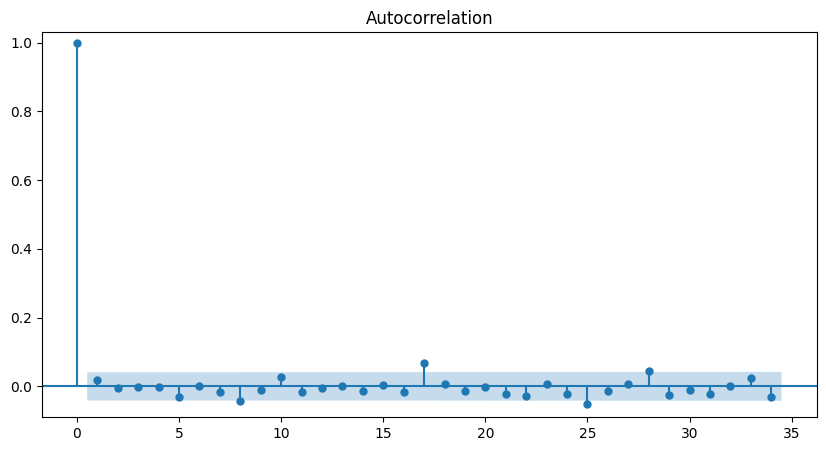

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_acf(goog["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.03])
plt.show()

# ACF is used to choose the order q of MA(q). From the plot we can see that there is pretty much no auto
# correlation of any order q greater than 0. Those which are slightly outside of the confidence interval, they are
# likely by a chance. So, we will choose q=0

c:\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


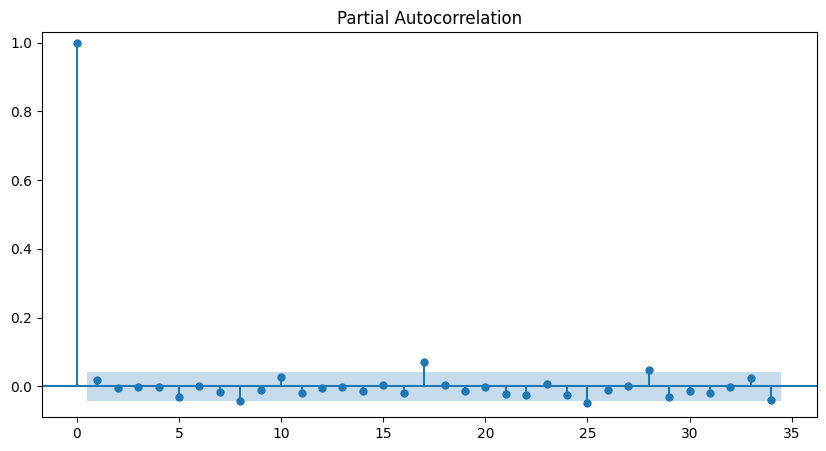

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_pacf(goog["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.03])
plt.show()

# PACF is used to choose the order p of AR(p) model. From the plot we can see that there is pretty much no auto
# correlation of any order p greater than 0. Those which are slightly outside of the confidence interval, they are
# likely by a chance. So, we will choose p=0

In [14]:
# According to PACF and ACF, the order will be ARIMA(0, 1, 0) which is nothing but Random Walk.

In [15]:
aapl = df.query("Name == 'AAPL'")[["Close"]].copy()

aapl["LogRet"] = log_return(aapl["Close"])

c:\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


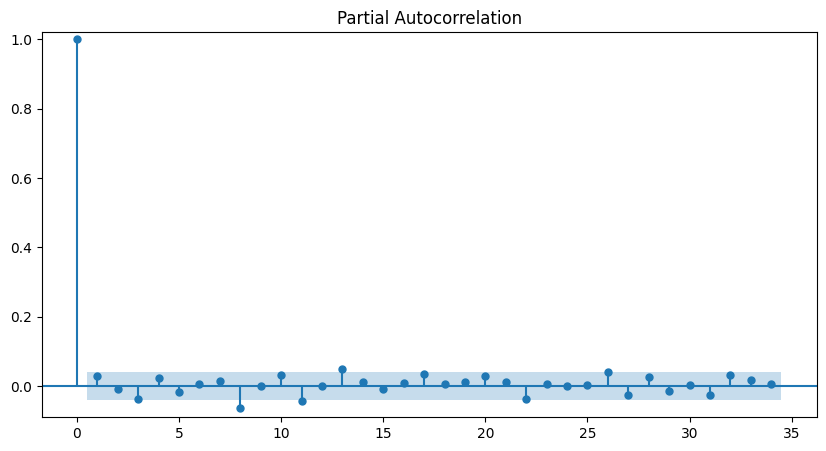

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_pacf(aapl["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.02])
plt.show()

# Will choose p = 0

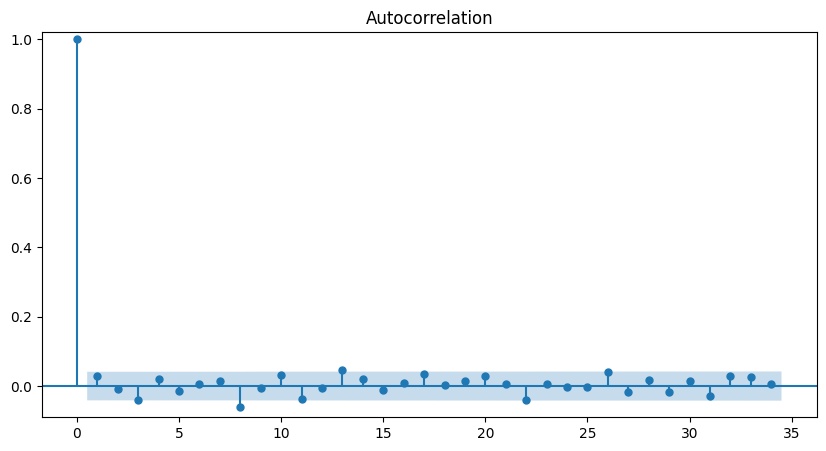

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_acf(aapl["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.02])
plt.show()

# Will choose q = 0

In [19]:
# Again, the apple stock price follows the Random Walk same as Google stock price.

In [20]:
ibm = df.query("Name == 'IBM'")[["Close"]].copy()
ibm["LogRet"] = log_return(ibm["Close"])

c:\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


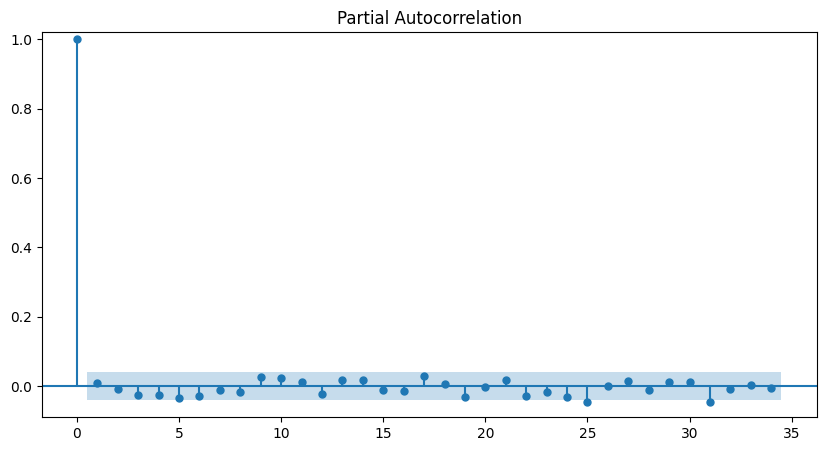

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_pacf(ibm["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.02])
plt.show()

# Will choose p = 0

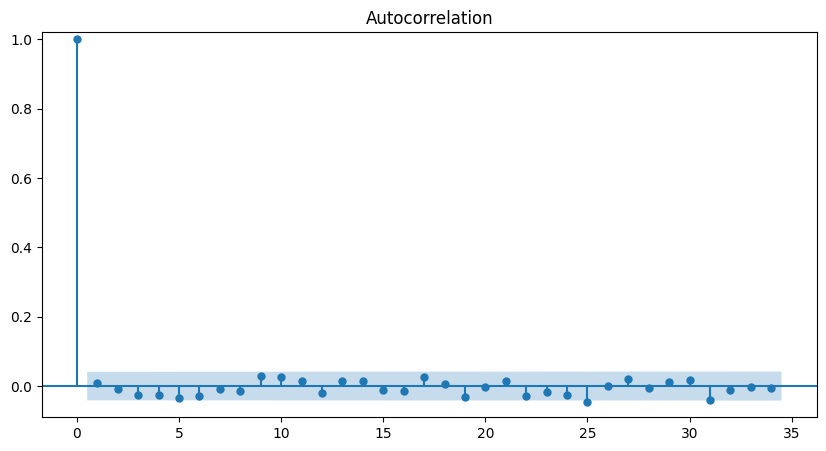

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_acf(ibm["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.09, 1.02])
plt.show()

# Will choose q = 0

In [23]:
sbux = df.query("Name == 'SBUX'")[["Close"]].copy()
sbux["LogRet"] = log_return(sbux["Close"])

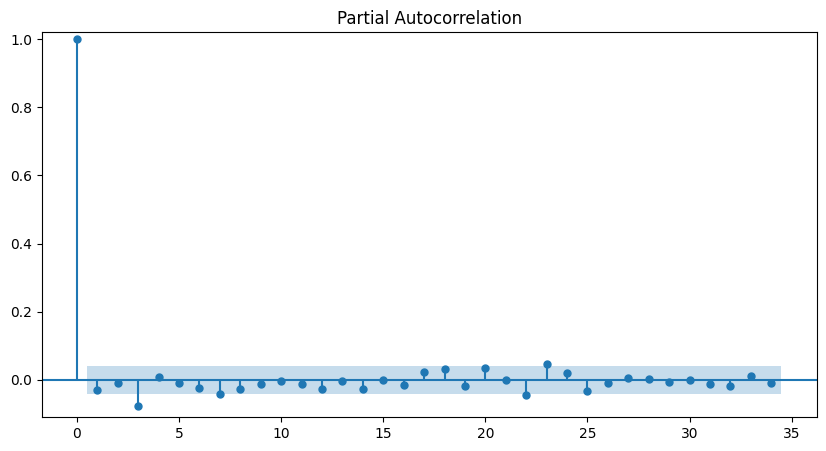

In [25]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_pacf(sbux["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.11, 1.02])
plt.show()

# Will choose p = 0 although at p = 3 there is a niticiable thing. We can consider that as very unlikely.

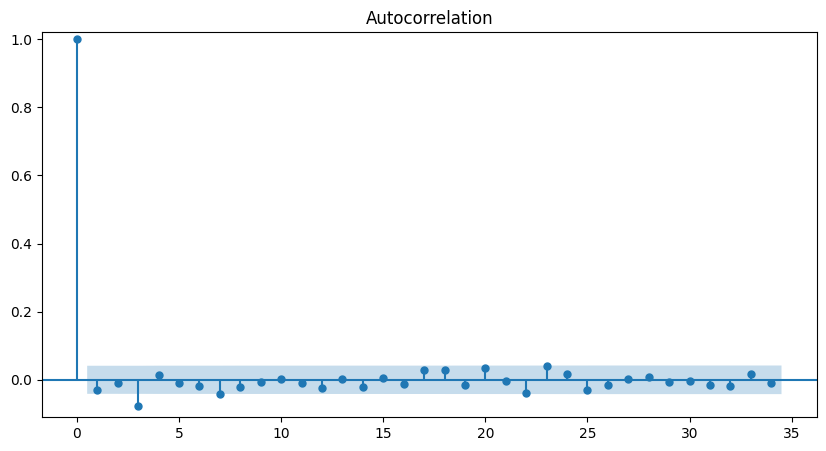

In [27]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_acf(sbux["LogRet"].dropna(), ax=ax)
ax.set_ylim([-0.11, 1.02])
plt.show()

# Will choose q = 0